In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "/Users/roshanmehta/Desktop/archive"

credits_df = pd.read_csv(path + "/tmdb_5000_credits.csv")
movies_df = pd.read_csv(path + "/tmdb_5000_movies.csv")

### Exploratory Data Analysis (EDA)

In [3]:
print(credits_df.shape)
credits_df['title'] = credits_df['title'].apply(str.lower)
credits_df.head(2)

(4803, 4)


,movie_id,title,cast,crew
0,19995,avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,pirates of the caribbean: at world's end,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
print(movies_df.shape)
movies_df['title'] = movies_df['title'].apply(str.lower)
movies_df.head(2)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",pirates of the caribbean: at world's end,6.9,4500


In [5]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
#credits_df.columns = ['id','title','cast','crew']

#movies_df = movies_df.merge(credits_df, on="id")
#movies_df = movies_df.drop(columns = "homepage")

movies_df = pd.merge(movies_df, credits_df, how = 'inner').drop(columns = 'movie_id')

In [8]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",pirates of the caribbean: at world's end,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


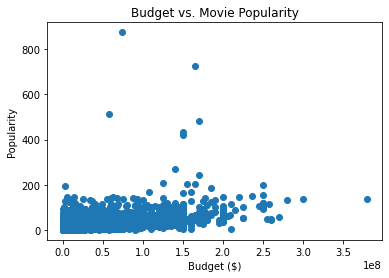

In [9]:
plt.scatter('budget', 'popularity', data=movies_df)
plt.title('Budget vs. Movie Popularity')
plt.xlabel('Budget ($)')
plt.ylabel('Popularity')
plt.show()

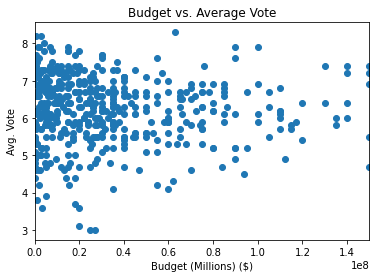

In [10]:
df_sample = movies_df[(movies_df.vote_average != 0) & (movies_df.budget != 0)].sample(500) #sampling 500 random movies

plt.scatter('budget', 'vote_average', data=df_sample, marker='o')
plt.title('Budget vs. Average Vote')
plt.xlabel('Budget (Millions) ($)')
plt.xlim(0, 150000000)
plt.ylabel('Avg. Vote')
plt.show()

In [11]:
from ast import literal_eval

features = ["cast", "crew", "keywords", "genres"]

for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

movies_df[features].head(10)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [12]:
#movies_df.loc[0, 'crew']

In [13]:
# extract the name of the director of the movie

def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [14]:
# returns the top 3 elements (or the entire list whichever is more)

def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

In [15]:
# applying both the functions

movies_df["director"] = movies_df["crew"].apply(get_director)

features = ["cast", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [16]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,pirates of the caribbean: at world's end,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,the dark knight rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,john carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [17]:
# cleaning data

def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [18]:
# creating a soup

def create_soup(features):
    return ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director'] + ' ' + ' '.join(features['genres'])


movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])

print(count_matrix.shape)

cosine_sim2 = cosine_similarity(count_matrix, count_matrix) 
print(cosine_sim2.shape)

movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

(4809, 11520)
(4809, 4809)


In [20]:
# Creating a reverse mapping of movie titles to the indices
# Then we are able to find the title of the movie based on the index

indices = pd.Series(movies_df.index, index=movies_df["title"]).drop_duplicates()

print(indices.head())

title
avatar                                      0
pirates of the caribbean: at world's end    1
spectre                                     2
the dark knight rises                       3
john carter                                 4
dtype: int64


In [82]:
# Get recommendations for the movies
# function that takes in a movie title and the cosine similarity score as input
# and outputs 10 movies similar to it.

def get_recommendations(title, cosine_sim=cosine_sim2):
    title = title.lower()
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:11]
    # (a, b) where a is id of movie, b is similarity_scores

    movies_indices = [ind[0] for ind in similarity_scores]
    movies = (movies_df["title"].str.title()).iloc[movies_indices]
    #print(type(movies))
    #return movies
    print('Because you enjoyed ' + title.title() + ', we recommend: \n')
    print(*movies, sep='\n')
    return ''


In [85]:
#print("Recommendations for Bee Movie")
print(get_recommendations("Bee Movie", cosine_sim2))

print()

#print("Recommendations for Iron Man")
print(get_recommendations("iron man", cosine_sim2))

Because you enjoyed Bee Movie, we recommend: 

Pooh'S Heffalump Movie
Valiant
Atlantis: The Lost Empire
Legend Of The Guardians: The Owls Of Ga'Hoole
Epic
Walking With Dinosaurs
Winnie The Pooh
The Tigger Movie
Jungle Shuffle
Running Forever


Because you enjoyed Iron Man, we recommend: 

Iron Man 2
Avengers: Age Of Ultron
The Avengers
Captain America: Civil War
Iron Man 3
Tron: Legacy
The Helix... Loaded
The Lovers
After Earth
Six-String Samurai



In [86]:
get_recommendations('spectre')

Because you enjoyed Spectre, we recommend: 

Skyfall
Quantum Of Solace
The Glimmer Man
The Art Of War
Nancy Drew
Amidst The Devil'S Wings
The Legend Of Tarzan
The Other Side Of Heaven
John Carter
Suicide Squad


''

In [87]:
get_recommendations('Toy Story')

Because you enjoyed Toy Story, we recommend: 

Toy Story 3
Toy Story 2
Cars 2
Monster House
Meet The Deedles
Alpha And Omega: The Legend Of The Saw Tooth Cave
Christmas With The Kranks
Madagascar: Escape 2 Africa
The Shaggy Dog
Zoom


''

In [88]:
def use():
    mov = 'test'
    while True:
        if mov == '':
            print('That was fun! Come back after you\'ve watched another movie!')
            break
        mov = input("\nEnter a movie you recently enjoyed: ")
        if mov == '':
            print()
            print('That was fun! Come back after you\'ve watched another movie!')
            break
            
        try:
            print()
            #print('Because you enjoyed ' + mov.title() + ', we recommend: \n', get_recommendations(mov))
            get_recommendations(mov)
            
        except KeyError:
            print()
            print('Movie not found, please check spelling and try again!')
            use()

In [89]:
use()


Because you enjoyed Cars, we recommend: 

Cars 2
The Adventures Of Rocky & Bullwinkle
Why I Did (Not) Eat My Father
Rugrats In Paris: The Movie
Brave
Flushed Away
Rio 2
The Croods
The Emperor'S New Groove
The Road To El Dorado

Because you enjoyed Pitch Perfect, we recommend: 

Down & Out With The Dolls
Pitch Perfect 2
Me You And Five Bucks
Begin Again
Sydney White
There'S Always Woodstock
Along The Roadside
The Sweetest Thing
Bridesmaids
The House Bunny

That was fun! Come back after you've watched another movie!
